In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('house price dataset.csv')

# Creating a binary target variable based on the median sale price
median_price = data['SalePrice'].median()
data['PriceCategory'] = (data['SalePrice'] > median_price).astype(int)  # 1 for high, 0 for low

# Selecting the features and the new binary target
X = data[['LotArea']]  # Using LotArea as an example feature
y = data['PriceCategory']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a Support Vector Machine model
model = SVC(kernel='rbf', C=1.0, gamma='auto')  # RBF kernel

# Fitting the model
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the model's performance metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Saving house price dataset.csv to house price dataset.csv
Accuracy: 0.64
Confusion Matrix:
[[116  45]
 [ 60  71]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


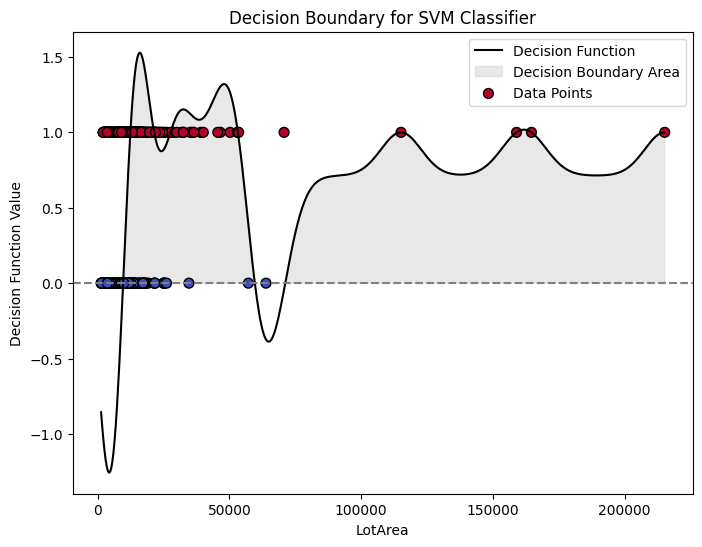

In [8]:
# Plotting decision boundary
def plot_decision_boundary(X, y, model, scaler):
    # Create a range of values for the feature
    x_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

    # Transform the range to match the feature scaling
    x_range_scaled = scaler.transform(x_range)

    # Get decision function scores
    decision_scores = model.decision_function(x_range_scaled)

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.plot(x_range, decision_scores, label='Decision Function', color='black')
    plt.fill_between(x_range.flatten(), decision_scores, color='lightgray', alpha=0.5, where=(decision_scores >= 0), label='Decision Boundary Area')

    # Plot the data points
    plt.scatter(X, y, c=y, cmap='coolwarm', edgecolor='k', s=50, label='Data Points')
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('LotArea')
    plt.ylabel('Decision Function Value')
    plt.title('Decision Boundary for SVM Classifier')
    plt.legend()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X[['LotArea']], y, model, scaler)